In [91]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Data Pre-processing and Feature Preparation

In [92]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [93]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [94]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [95]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

In [96]:
#training_set

In [97]:
#testing_set

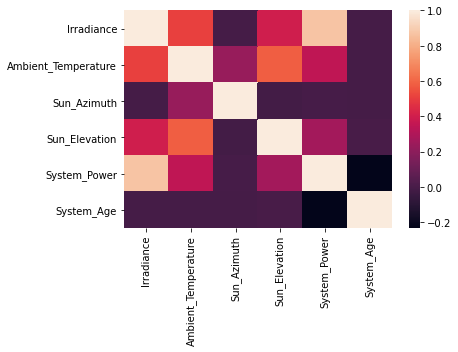

In [98]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [99]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

# Binary Classification Model 1

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_training_scaled, y_2c_training, test_size=0.15, random_state=4720)
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)
lr = LogisticRegression(max_iter=1000)
y_pred = lr.fit(X_train_pol, y_train).predict(X_val_pol)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8071895424836601


# Binary Classification Model 2

In [126]:
from sklearn.neural_network import MLPClassifier

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train_pol.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train_pol, y_train).predict(X_val_pol)
print("Accuracy with polynomial features:", accuracy_score(y_val, y_pred))

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train, y_train).predict(X_val)
print("Accuracy with linear features:", accuracy_score(y_val, y_pred))

Accuracy with polynomial features: 0.8392156862745098
Accuracy with linear features: 0.7843137254901961


C:\Users\mussi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
